***GRADED CHALLENGE 1***

``Nama : Rahmat Fadhli Syauqi``

``Batch : 11``

*Dataset Description*

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

The feature of this data is:

* #: ID for each pokemon
* Name: Name of each pokemon
* Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
* Type 2: Some pokemon are dual type and have 2
* Total: sum of all stats that come after this, a general guide to how strong a pokemon is
* HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
* Attack: the base modifier for normal attacks (eg. Scratch, Punch)
* Defense: the base damage resistance against normal attacks
* SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* SP Def: the base damage resistance against special attacks
* Speed: determines which pokemon attacks first each round

**Import Pustaka**

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
plt.style.use('seaborn-darkgrid')


**Data Loading**

In [120]:
df = pd.read_csv("../dataset/Pokemon.csv")
df.head(10) #Menampilkan 10 data teratas

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [121]:
df.info() #Menampilkan semua kolom beserta tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [122]:
df.describe() #Menampilkan info statistik dari data

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [123]:
df.isnull().sum() #Menampilkan jumlah data yang kosong

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Terdapat kekosongan data pada bagian "Type 2" maka dari ini diharuskan untuk melakukan Data Cleaning

**Data Cleaning**

In [124]:
df.head(10)  #Menampilkan 10 data teratas

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Pada tabel diatas , terdapat nama pokemon yang tidak efektif untuk dibaca, maka dari ini saya menghapus kata "Mega" yang tertempel dengan nama lainnya.

In [125]:
df['Type 2'].fillna(df['Type 1'], inplace=True)
df.head(10)  #Menampilkan hasil data cleaning yang sudah dilakukan

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False


Pada Type pokemon yang memiliki kekosongan pada Type 2, dianggap sama dengan Type 1 , maka itu dilakukan replacing dengan penamaan Type 1.

In [126]:

df['Name'] = df['Name'].str.replace(".*(?=Mega)", "")

C:\Users\THESEV~1\AppData\Local\Temp/ipykernel_14992/2777585947.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(".*(?=Mega)", "")


In [127]:
df.head(10) #Menampilkan hasil cleansing nama

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False


**Eksplorasi Data**

In [128]:
df.head(10) #Menampilkan 10 data teratas

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,Water,314,44,48,65,50,64,43,1,False


In [129]:
df.tail(10) #Menampilkan 10 data terbawah

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,Fairy,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


Dikarenakan terdapat berbagai macam besaran 'Attack' pada tabel diatas, maka saya ingin melakukan pemilahan pada Kolom tersebut.

In [130]:
df.sort_values('Attack',ascending=False).head(10)  #Melihat 10 peringkat pokemon dari atas

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,Mega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,Psychic,600,50,180,20,180,20,150,3,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
494,445,Mega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
527,475,Mega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
387,354,Mega Banette,Ghost,Ghost,555,64,165,75,93,83,75,3,False
454,409,Rampardos,Rock,Rock,495,97,165,60,65,50,58,4,False


In [131]:
df.sort_values('Attack',ascending=False).tail(10) #Melihat 10 peringkat pokemon dari bawah

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
508,458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False
198,183,Marill,Water,Fairy,250,70,20,50,20,50,40,2,False
179,165,Ledyba,Bug,Flying,265,40,20,30,40,80,55,2,False
68,63,Abra,Psychic,Psychic,310,25,20,15,105,55,90,1,False
381,349,Feebas,Water,Water,200,20,15,20,10,55,80,3,False
139,129,Magikarp,Water,Water,200,20,10,55,15,20,80,1,False
261,242,Blissey,Normal,Normal,540,255,10,10,75,135,55,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
121,113,Chansey,Normal,Normal,450,250,5,5,35,105,50,1,False
488,440,Happiny,Normal,Normal,220,100,5,5,15,65,30,4,False


Dari hasil diatas yang didapatkan pokemon yang memiliki besaran attack paling tinggi adalah **Mega Meowtwo X** dan yang paling rendah adalah **Happiny.**

In [132]:
#Menampilkan pokemon mana yang memiliki Attack & Defense diatas 100
df.query("Attack > 100 & \
         Defense > 100").sort_values(by = 'Attack' , ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
232,214,Mega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
494,445,Mega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
268,248,Mega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
796,719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
543,486,Regigigas,Normal,Normal,670,110,160,110,80,110,100,4,True
137,127,Mega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
141,130,Mega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
423,383,Groudon,Ground,Ground,670,100,150,140,100,90,90,3,True
229,212,Mega Scizor,Bug,Steel,600,70,150,140,65,100,75,2,False


In [133]:
#Menampilkan 10 pokemon teratas dengan Attack & HP 100.
df.query("Attack > 100 & \
         HP > 100").sort_values(by = 'Attack' , ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
426,384,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
494,445,Mega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
543,486,Regigigas,Normal,Normal,670,110,160,110,80,110,100,4,True
313,289,Slaking,Normal,Normal,670,150,160,100,95,65,100,3,False
164,150,Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
515,464,Rhyperior,Ground,Rock,535,115,140,130,55,55,40,4,False
615,555,DarmanitanStandard Mode,Fire,Fire,480,105,140,55,30,55,95,5,False


In [134]:
#Menampilkan 10 pokemon berjenis Legendary teratas dengan Attack 100.
df.query("Attack > 100 & \
         Legendary == True").sort_values(by = 'Attack' , ascending = False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,Psychic,600,50,180,20,180,20,150,3,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
543,486,Regigigas,Normal,Normal,670,110,160,110,80,110,100,4,True
796,719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
164,150,Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
422,382,KyogrePrimal Kyogre,Water,Water,770,100,150,90,180,160,90,3,True


In [135]:
#Menampilkan isi dari Kolom Type 1 & Type 2
print('Unique Type 1 Pokemon : ', df['Type 1'].unique())
print('Unique Type 2 Pokemon : ', df['Type 2'].unique())

Unique Type 1 Pokemon :  ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Unique Type 2 Pokemon :  ['Poison' 'Fire' 'Flying' 'Dragon' 'Water' 'Bug' 'Normal' 'Electric'
 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark'
 'Ghost']


In [136]:
#Menampilkan jumlah total dari tial kolom
print('Unique Type 1 Pokemon : ', df['Type 1'].nunique())
print('Unique Type 2 Pokemon : ', df['Type 2'].nunique())

Unique Type 1 Pokemon :  18
Unique Type 2 Pokemon :  18


In [137]:
#Menampilkan 5 peringkat pokemon dari atas
df.sort_values('Attack',ascending=False).head(5)  

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,Mega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,Psychic,600,50,180,20,180,20,150,3,True


In [138]:
#Menghitung jumlah pokemon pada setiap tipe
print(df['Type 1'].value_counts(), '\n' ,df['Type 2'].value_counts())


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64 
 Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Steel       27
Ice         27
Ghost       24
Rock        23
Bug         20
Name: Type 2, dtype: int64


In [139]:
#Menampilkan jumlah pokomen dari setiap kombinasi Type 1 dengan Type 2
print(df.groupby(['Type 1' , 'Type 2']).size()
     .sort_values(ascending=False))

Type 1    Type 2 
Normal    Normal     61
Water     Water      59
Psychic   Psychic    38
Grass     Grass      33
Fire      Fire       28
                     ..
Electric  Ice         1
Fire      Water       1
Electric  Grass       1
          Ghost       1
Psychic   Dark        1
Length: 154, dtype: int64


In [140]:
#Menampilkan jumlah pokemon pada Tipe 1 yang berjenis Legendary/Bukan
print(df.groupby(['Type 1' , 'Legendary']).size()
     .sort_values(ascending=False))

Type 1    Legendary
Water     False        108
Normal    False         96
Bug       False         69
Grass     False         67
Fire      False         47
Psychic   False         43
Electric  False         40
Rock      False         40
Ghost     False         30
Dark      False         29
Ground    False         28
Poison    False         28
Fighting  False         27
Steel     False         23
Ice       False         22
Dragon    False         20
Fairy     False         16
Psychic   True          14
Dragon    True          12
Fire      True           5
Ground    True           4
Rock      True           4
Electric  True           4
Steel     True           4
Water     True           4
Grass     True           3
Ice       True           2
Ghost     True           2
Normal    True           2
Flying    True           2
          False          2
Dark      True           2
Fairy     True           1
dtype: int64


In [141]:
#Menampilkan jumlah pokemon pada Tipe 2 yang berjenis Legendary/Bukan
print(df.groupby(['Type 2' , 'Legendary']).size()
     .sort_values(ascending=False))

Type 2    Legendary
Flying    False        84
Water     False        69
Normal    False        63
Grass     False        57
Psychic   False        57
Poison    False        49
Ground    False        46
Fighting  False        42
Fire      False        36
Fairy     False        35
Electric  False        31
Dark      False        28
Steel     False        25
Dragon    False        25
Ice       False        23
Ghost     False        23
Rock      False        22
Bug       False        20
Flying    True         15
Psychic   True         14
Ice       True          4
Fire      True          4
Fighting  True          4
Dragon    True          4
Water     True          4
Fairy     True          3
Ground    True          2
Normal    True          2
Electric  True          2
Steel     True          2
Dark      True          2
Grass     True          1
Ghost     True          1
Rock      True          1
dtype: int64


In [142]:
#Menampilkan Tipe "Dragon" yang memiliki serangan terbesar.
attack_100 = df[
    (df["Type 1"] == "Psychic") &
    (df["Attack"] > 100)
].sort_values(by = 'Attack' , ascending = False)
attack_100.loc[:,['Type 1','Name','Attack', 'Legendary']]

,Type 1,Name,Attack,Legendary
163,Psychic,Mega Mewtwo X,190,True
429,Psychic,DeoxysAttack Forme,180,True
527,Psychic,Mega Gallade,165,False
798,Psychic,HoopaHoopa Unbound,160,True
164,Psychic,Mega Mewtwo Y,150,True
428,Psychic,DeoxysNormal Forme,150,True
526,Psychic,Gallade,125,False
539,Psychic,Azelf,125,True
162,Psychic,Mewtwo,110,True
797,Psychic,HoopaHoopa Confined,110,True


In [143]:
#Menampilkan Tipe "Dragon" yang memiliki serangan terbesar.
attack_100 = df[
    (df["Type 1"] == "Dragon") &
    (df["Attack"] > 100)
].sort_values(by = 'Attack' , ascending = False)
attack_100.loc[:,['Type 1','Name','Attack']]

,Type 1,Name,Attack
426,Dragon,Mega Rayquaza,180
494,Dragon,Mega Garchomp,170
711,Dragon,KyuremBlack Kyurem,170
425,Dragon,Rayquaza,150
707,Dragon,Zekrom,150
673,Dragon,Haxorus,147
409,Dragon,Mega Salamence,145
408,Dragon,Salamence,135
161,Dragon,Dragonite,134
493,Dragon,Garchomp,130


**Visualisations**

Penggambaran dari data yang sudah di eksplorasi untuk ditampilkan dengan sebuah chart statistika untuk memperjelas dari setiap tipe.

In [144]:
%matplotlib inline

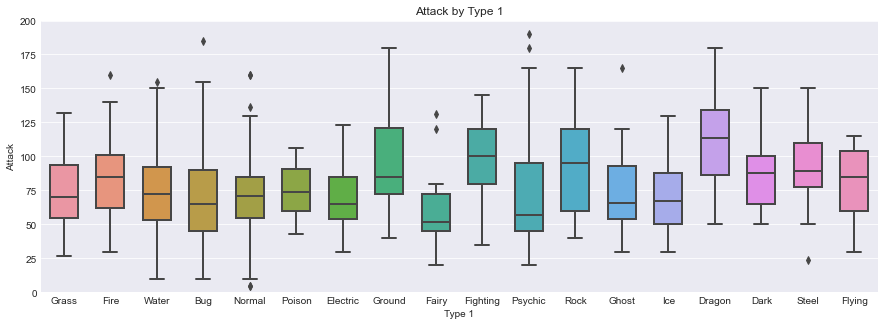

In [145]:
plt.subplots(figsize = (15,5))
plt.title('Attack by Type 1')
sns.boxplot(x = "Type 1", y = "Attack",data = df, width=0.6, linewidth=2)
plt.ylim(0,200)
plt.show()

Dari grafik diatas **Type 1** pokemon yang memiliki **Max Attack** paling tinggi adalah dengan tipe **Dragon**.

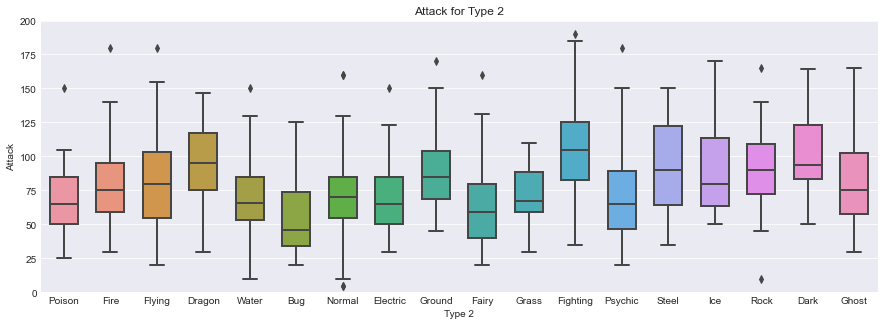

In [146]:
plt.subplots(figsize = (15,5))
plt.title('Attack for Type 2')
sns.boxplot(x = "Type 2", y = "Attack",data = df, width=0.6, linewidth=2)
plt.ylim(0,200)
plt.show()

Untuk **Type 2**, data yang dapat dilihat bahwa tipe **Fighting** memiliki **Maximum Attack** paling tinggi daripada yang lain.

Dari hal ini kita dapat melihat persebaran besaran **Attack**, kita harus mencari rata-rata **Attack**  agar mendapatkan hasil kesimpulan yang diinginkan.

In [147]:
average_attack_T1 = df.groupby("Type 1", sort=False)["Attack"].mean()

In [148]:
average_attack_T2 = df.groupby("Type 2", sort=False)["Attack"].mean()

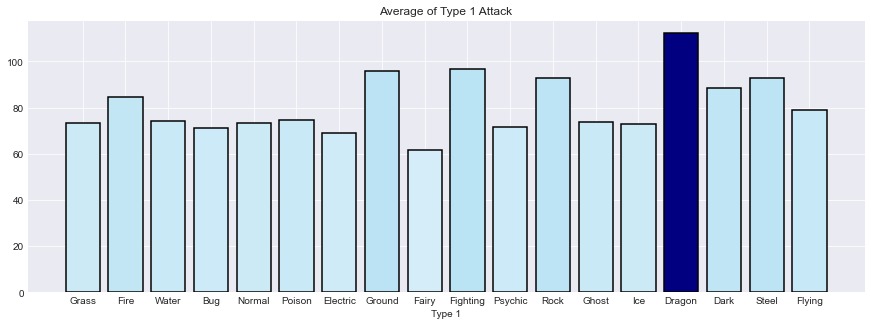

In [149]:
plt.subplots(figsize = (15,5))
values_colour = average_attack_T1
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*3))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "skyblue", "navy"])
plt.bar(df['Type 1'].unique(),average_attack_T1, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black')
plt.xlabel('Type 1')
plt.title('Average of Type 1 Attack')
plt.show()

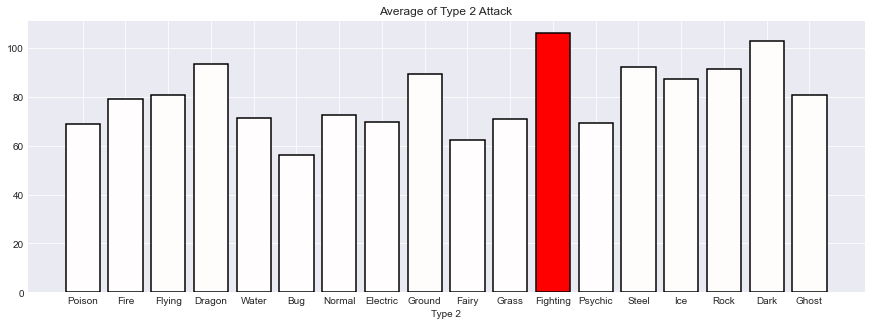

In [150]:
plt.subplots(figsize = (15,5))
values_colour = average_attack_T2
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*3))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "snow", "red"])
plt.bar(df['Type 2'].unique(),average_attack_T2, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black')
plt.xlabel('Type 2')
plt.title('Average of Type 2 Attack')
plt.show()


Dari kedua grafik diatas bahwa perbandingan rata-rata **Attack** pada **Type 1** yaitu **Type Dragon** sedangkan untuk **Type 2** yaitu **Type Fighting** yang memiliki rata-rata pokemon dengan serangan yang tinggi.

In [151]:
average_attack_gen = df.groupby("Generation", sort=False)["Attack"].mean()

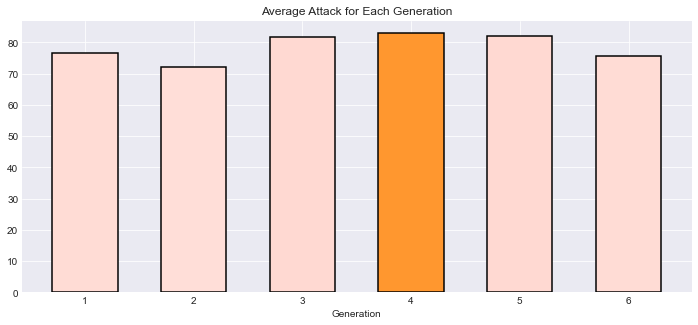

In [152]:
plt.subplots(figsize = (12,5))
values_colour = average_attack_gen.values/average_attack_gen.values.max()
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*8))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "tomato", "yellow"])
plt.bar(df['Generation'].unique(),average_attack_gen, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black', width = 0.6)
plt.xlabel('Generation')
plt.title('Average Attack for Each Generation')
plt.show()

Dari grafik di atas perbandingan rata-rata serangan tiap **Generation** memiliki tingkatan yang hampir seragam. **Generation 1** memiliki besaran serangan yang lebih tinggi dari **Generation** lainnya.

Dikarenakan **Generation 4** adalah **Generation** yang memiliki rata-rata serangan pokemon paling tinggi, maka kita lihat tipe pokemon apa yang memiliki rata-rata serangan pada **Generation 4**.

In [153]:
 df_gen4 = df[df['Generation'] == 4] #Membuat variabel baru untuk data pokemon Generation 1

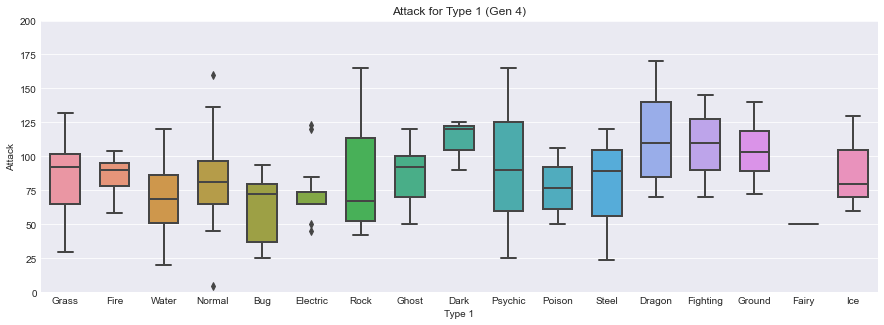

In [154]:
plt.subplots(figsize = (15,5))
plt.title('Attack for Type 1 (Gen 4)')
sns.boxplot(x = "Type 1", y = "Attack",data = df_gen4, width=0.6, linewidth=2)
plt.ylim(0,200)
plt.show()

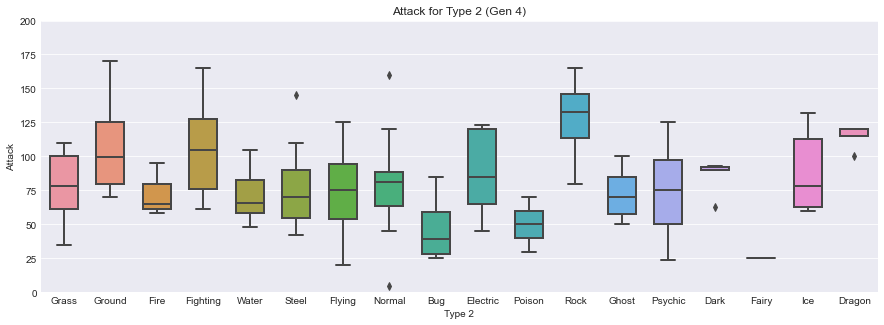

In [155]:
plt.subplots(figsize = (15,5))
plt.title('Attack for Type 2 (Gen 4)')
sns.boxplot(x = "Type 2", y = "Attack",data = df_gen4, width=0.6, linewidth=2)
plt.ylim(0,200)
plt.show()

Dari kedua grafik di atas dapat dilihat bahwa pada **Type 1** tipe yaitu **Dragon** cukup besar dengan nilai maksimum paling tinggi dari tipe lainnya. Pada pokemo **Type 2** yaitu **Rock**  daripada tipe lainnya

Selanjutnya melakukan pencarian nilai rata-rata serangan pada tiap **Type** di **Generation**

In [156]:
#Variabel baru untuk data pokemon Generasi 4 Tipe 1

df_gen4t1 = df[df['Generation'] == 4].sort_values(by = 'Type 1')
average_attack_gen4t1 = df_gen4t1.groupby("Type 1")["Attack"].mean()

In [157]:
#Variabel baru untuk data pokemon Generasi 4 Tipe 2

df_gen4t2 = df[df['Generation'] == 4].sort_values(by = 'Type 2')
average_attack_gen4t2 = df_gen4t2.groupby("Type 2")["Attack"].mean()

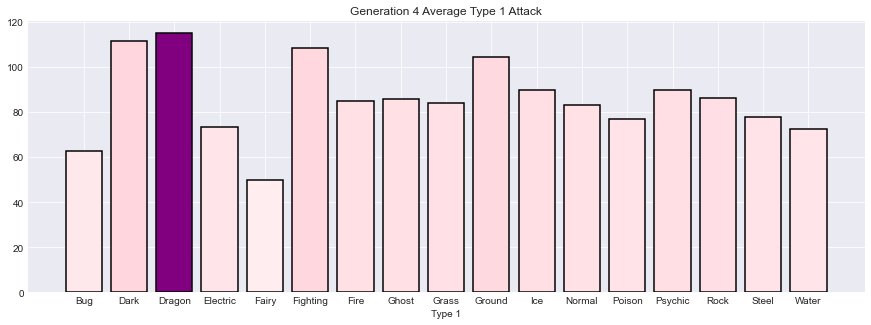

In [158]:
plt.subplots(figsize = (15,5))
values_colour = average_attack_gen4t1
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*3))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "pink", "purple"])
plt.bar(df_gen4t1['Type 1'].unique(),average_attack_gen4t1, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black')
plt.xlabel('Type 1')
plt.title('Generation 4 Average Type 1 Attack')
plt.show()

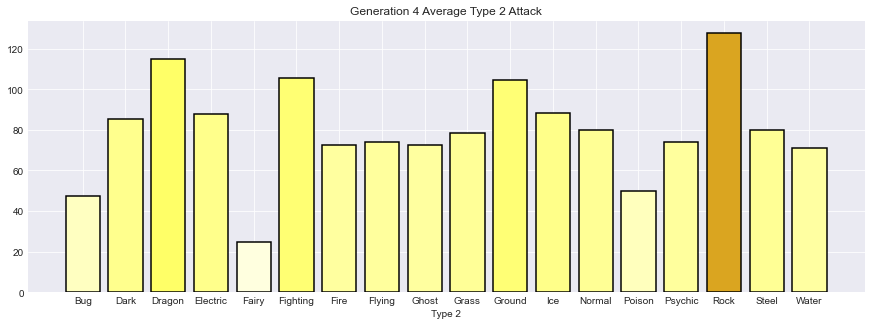

In [159]:
plt.subplots(figsize = (15,5))
values_colour = average_attack_gen4t2
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*3))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "yellow", "goldenrod"])
plt.bar(df_gen4t2['Type 2'].unique(),average_attack_gen4t2, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black')
plt.xlabel('Type 2')
plt.title('Generation 4 Average Type 2 Attack')
plt.show()

Dari data diatas, dilihat dari rata-rata pokemon pada **Generation 4** dengan serangan tertinggi pada **Type 1** adalah tipe **Dragon** dan untuk **Type 2** adalah **Rock**

Dari hal ini kita dapat membandingkan kecepatan pokemon **Normal** dengan **Legendary** untuk semua generasi pada data yang kita punya.

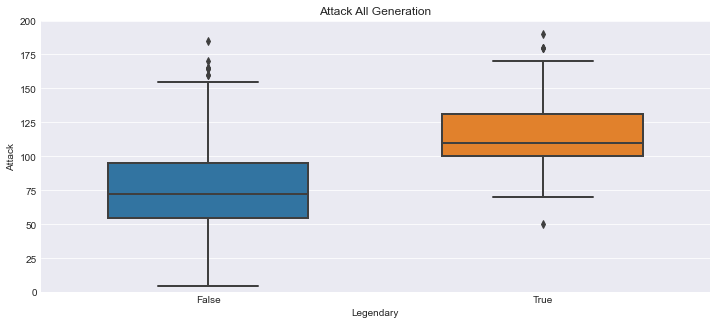

In [160]:
plt.subplots(figsize = (12,5))
plt.title('Attack All Generation')
sns.boxplot(x = "Legendary", y = "Attack",data = df, width=0.6, linewidth=2)
plt.ylim(0,200)
plt.show()

Dari grafik diatas, dapat kita lihat rentang pokemon **Legendary** masih memiliki rentang data yang tinggi dari pokemon **Normal**. 

Dengan ini mari kita cari lebih dalam perihal rata-rata serangan dari setiap **Type** antara pokemon **Legendary**.

In [161]:
#Variabel baru untuk data pokemon Legendary
df_legendarypoke = df[df['Legendary'] == True] 

In [162]:
df_legendarypokeT1 = df_legendarypoke.sort_values(by = 'Type 1')
average_attack_LGT1 = df_legendarypokeT1.groupby("Type 1")["Attack"].mean()

In [163]:
df_legendarypokeT2 = df_legendarypoke.sort_values(by = 'Type 2')
average_attack_LGT2 = df_legendarypokeT2.groupby("Type 2")["Attack"].mean()

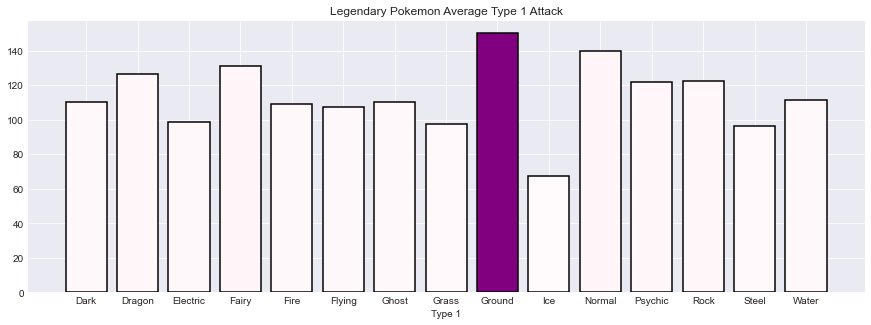

In [164]:
plt.subplots(figsize = (15,5))
values_colour = average_attack_LGT1
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*3))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "lavenderblush", "purple"])
plt.bar(df_legendarypokeT1['Type 1'].unique(),average_attack_LGT1, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black')
plt.xlabel('Type 1')
plt.title('Legendary Pokemon Average Type 1 Attack')
plt.show()


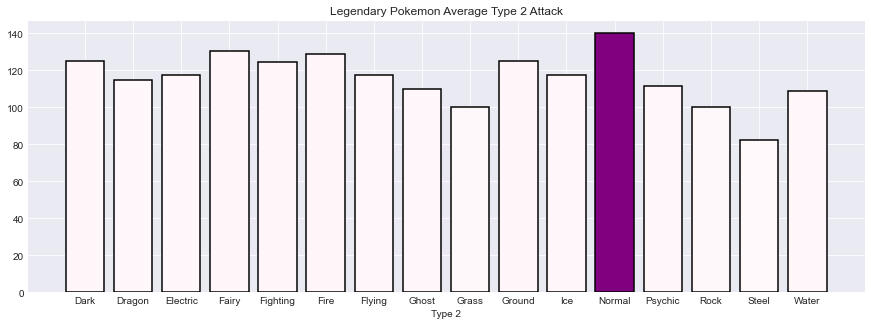

In [165]:
plt.subplots(figsize = (15,5))
values_colour = average_attack_LGT2
def check_colour(values):
  max_values = 0
  colour_list = []
  for a in values:
    if a > max_values:
      max_values = a
  for a in values:
    if a == max_values:
      colour_list.append(a/1.5)
    else:
      colour_list.append(a/(max_values*3))
  return colour_list
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "lavenderblush", "purple"])
plt.bar(df_legendarypokeT2['Type 2'].unique(),average_attack_LGT2, color=cmap(check_colour(values_colour)), linewidth = 1.5, edgecolor = 'black')
plt.xlabel('Type 2')
plt.title('Legendary Pokemon Average Type 2 Attack')
plt.show()

Pada pokemon **Legendary**. Tipe pokemon pada **Type 1** dengan rata-rata serangan terbesar adalah **Ground**. Sedangkan untuk **Type 2** memiliki rata-rata serangan terbesar adalah **Normal**

## **Kesimpulan**

Dari data yang sudah diolah dan dianalisis hasil-nya adalah:

-  Pokemon dengan serangan paling tinggi adalah **Mega Mewtwo X** dan yang serangan paling rendah adalah **Happiny**.
- Tipe pokemon dengan memiliki rata-rata serangan paling tinggi adalah **Dragon** untuk **Type 1** dan **Fighting** untuk **Type 2**.
- **Generation 4** adalah generasi yang memiliki rata-rata pokemon serangan terbesar.
- Pada pokemon dengan rata-rata serangan terbesar pada **Generation 4**. Pokemon dengan **Type 1** adalah pokemon tipe **Dragon** dan tipe **Rock** memiliki rata-rata serangan paling tinggi pada **Type 2**.
- Pada perbandingan pokemon **Normal** dan pokemon **Legendary**, pokemon dengan jenis **Legendary** memiliki serangan lebih tinggi daripada pokemon berjenis **Normal**. 
- Pada jenis **Legendary**, Pokemon tipe **Ground** pada **Type 1**, dan tipe **Normal** pada tipe **Type 2** yang memiliki rata-rata serangan paling tinggi.

**RECOMMENDED** : Jika menginginkan pokemon dengan besaran serangan terbesar daripada tipe lain, dapat memilik pokemon yang memiliki  **Type 1/2 = Dragon**. dan untuk **Generation 4** disarankan memilih *Type 1 = Dragon** dan **Type 2 = Rock**.

Dan untuk pokemon jenis **Legendary** disarankan untuk memilih tipe **Ground** untuk **Type 1** dan **Normal** untuk **Type 2**.